In [74]:
# # Option A: Upload + use file directly (recommended for working in Colab/Jupyter)
# # In Colab:
# from google.colab import files
# uploaded = files.upload()  # choose your_image.jpg from your PC



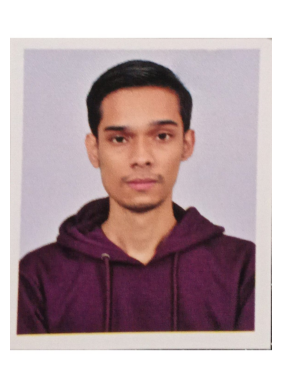

In [75]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("Gaurav_Pic.jpg").convert("RGB")
plt.imshow(img)
plt.axis("off")

rgb = np.array(img)


In [76]:
# Generate full base64 string and save to a text file
import base64

# 1. Read the image file
with open("Gaurav_Pic.jpg", "rb") as f:
    b64 = base64.b64encode(f.read()).decode()

# 2. Save base64 into a text file
with open("image_b64.txt", "w") as f:
    f.write(b64)

print("Saved base64 to image_b64.txt — download and copy its full contents.")


Saved base64 to image_b64.txt — download and copy its full contents.


A

1

Grayscale image shape: (1599, 1132)


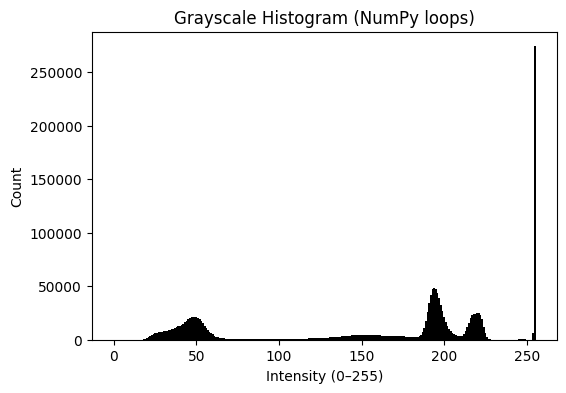

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ------------------------------
# 1) LOAD YOUR IMAGE
# ------------------------------
# Make sure the image exists in the environment (uploaded earlier)
img = Image.open("Gaurav_Pic.jpg").convert("L")   # convert to grayscale
gray_img = np.array(img)

print("Grayscale image shape:", gray_img.shape)

# ------------------------------
# 2) HISTOGRAM FUNCTION (NUMPY + LOOPS)
# ------------------------------
def gray_histogram(gray_img):
    """
    Compute grayscale histogram using pure loops (no np.histogram, no cv2).
    gray_img: 2D array with values 0–255
    """
    hist = np.zeros(256, dtype=np.int32)

    H, W = gray_img.shape
    for i in range(H):
        for j in range(W):
            pixel = gray_img[i, j]
            hist[pixel] += 1

    return hist

# ------------------------------
# 3) COMPUTE HISTOGRAM
# ------------------------------
hist = gray_histogram(gray_img)

# ------------------------------
# 4) PLOT GRAYSCALE HISTOGRAM
# ------------------------------
plt.figure(figsize=(6,4))
plt.bar(np.arange(256), hist, width=1.0, color="black")
plt.title("Grayscale Histogram (NumPy loops)")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Count")
plt.show()


2

RGB Image shape: (1599, 1132, 3)


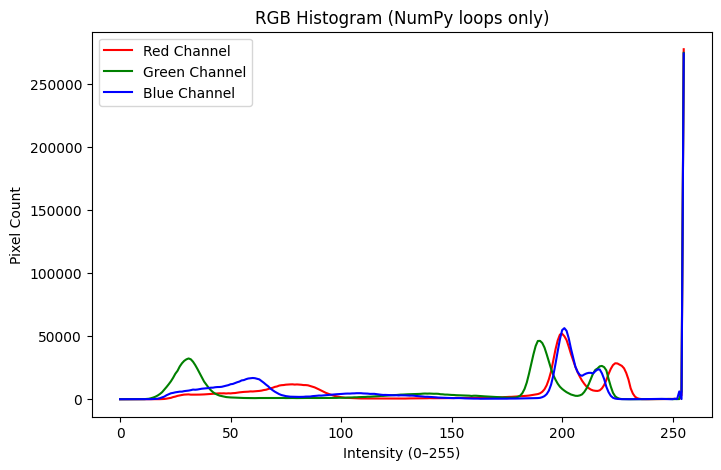

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------------------------
# 1) LOAD RGB IMAGE (must be done BEFORE calling the histogram function)
# ---------------------------------------------
img_rgb = Image.open("Gaurav_Pic.jpg").convert("RGB")
rgb_img = np.array(img_rgb)

print("RGB Image shape:", rgb_img.shape)

# ---------------------------------------------
# 2) RGB HISTOGRAM FUNCTION (NumPy + loops)
# ---------------------------------------------
def rgb_histogram(rgb_img):
    hist_r = np.zeros(256, dtype=np.int32)
    hist_g = np.zeros(256, dtype=np.int32)
    hist_b = np.zeros(256, dtype=np.int32)

    H, W, _ = rgb_img.shape
    for i in range(H):
        for j in range(W):
            r, g, b = rgb_img[i, j]
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

# ---------------------------------------------
# 3) COMPUTE RGB HISTOGRAMS
# ---------------------------------------------
hist_r, hist_g, hist_b = rgb_histogram(rgb_img)

# ---------------------------------------------
# 4) PLOT THE RGB HISTOGRAM
# ---------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(hist_r, color='red',   label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue',  label='Blue Channel')
plt.title("RGB Histogram (NumPy loops only)")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(False)
plt.show()


B

In [79]:
import numpy as np

# -------------------------------------------------------------
# RGB → HSV (NumPy-only, OpenCV-compatible scaling)
# -------------------------------------------------------------
def rgb_to_hsv(rgb_img):
    """
    Convert an RGB image (0–255 uint8) to HSV
    using ONLY NumPy and formulas (no cv2).

    Output HSV is in OpenCV format:
        H : 0–179
        S : 0–255
        V : 0–255
    """

    # Normalize to 0–1
    rgb = rgb_img.astype(np.float32) / 255.0
    R = rgb[:, :, 0]
    G = rgb[:, :, 1]
    B = rgb[:, :, 2]

    Cmax = np.max(rgb, axis=2)
    Cmin = np.min(rgb, axis=2)
    Δ = Cmax - Cmin

    # ----------------------------
    # HUE
    # ----------------------------
    H = np.zeros_like(Cmax)

    mask = (Δ != 0)

    # Case 1: Cmax = R
    idx = (mask) & (Cmax == R)
    H[idx] = 60 * (((G[idx] - B[idx]) / Δ[idx]) % 6)

    # Case 2: Cmax = G
    idx = (mask) & (Cmax == G)
    H[idx] = 60 * (((B[idx] - R[idx]) / Δ[idx]) + 2)

    # Case 3: Cmax = B
    idx = (mask) & (Cmax == B)
    H[idx] = 60 * (((R[idx] - G[idx]) / Δ[idx]) + 4)

    # OpenCV hue uses 0–179 instead of 0–360
    H = H / 2.0

    # ----------------------------
    # SATURATION
    # ----------------------------
    S = np.zeros_like(Cmax)
    nonzero = (Cmax != 0)
    S[nonzero] = (Δ[nonzero] / Cmax[nonzero]) * 255

    # ----------------------------
    # VALUE
    # ----------------------------
    V = Cmax * 255

    # ----------------------------
    # Stack HSV → uint8
    # ----------------------------
    hsv = np.stack([H, S, V], axis=2).astype(np.uint8)

    return hsv


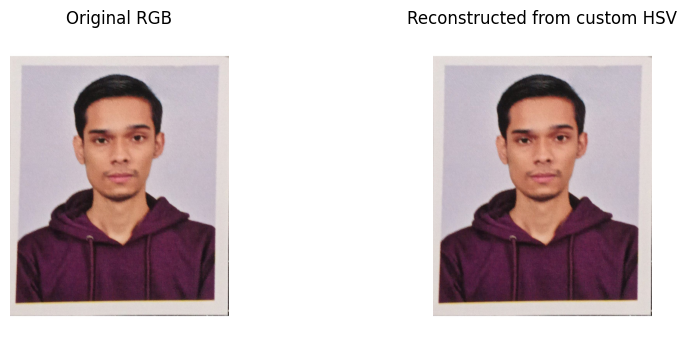

In [80]:
import cv2
import matplotlib.pyplot as plt

# Load original RGB
rgb = np.array(Image.open("Gaurav_Pic.jpg").convert("RGB"))

# Convert using your custom function
hsv_custom = rgb_to_hsv(rgb)

# Convert HSV → RGB using OpenCV to verify correctness
rgb_reconstructed = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

# Compare visually
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb_reconstructed)
plt.title("Reconstructed from custom HSV")
plt.axis("off")

plt.show()


C

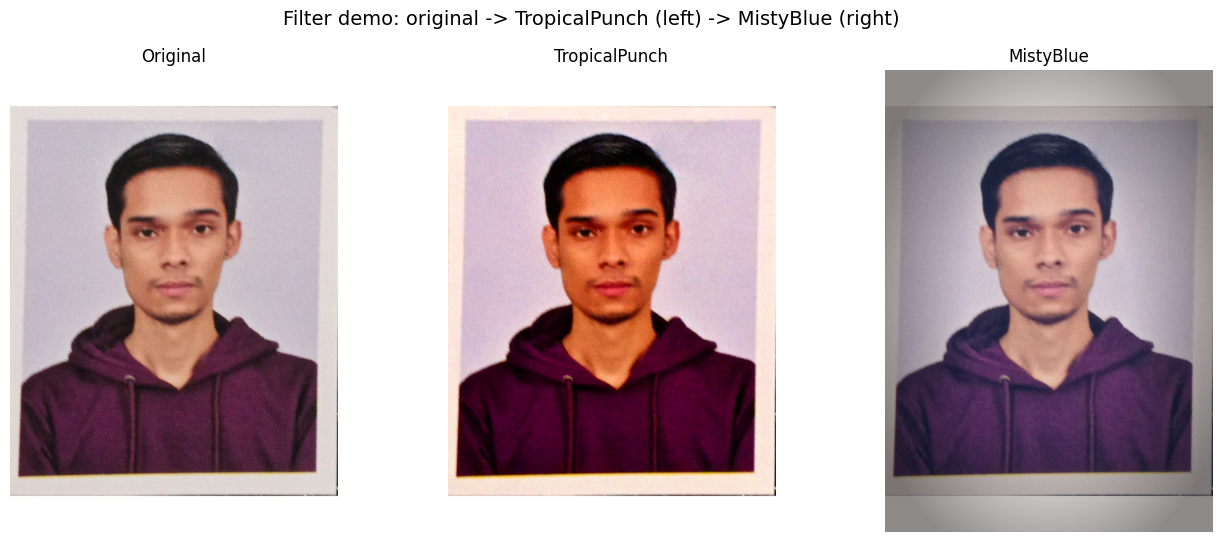

Notes:
TropicalPunch: I boosted contrast, added a non-linear saturation/vibrance increase, applied a warm highlight tint and slight gamma to make colors pop. Suited for beach, travel, food images where warmth and vivid colors improve appeal.
MistyBlue    : I applied split-toning (blue shadows + warm highlights), slight desaturation, contrast softening and a soft vignette to create a dreamy moody look. Suited for rainforest, dusk cityscapes, and moody landscapes.


In [81]:
# Part C — Two creative filters (NumPy + cv2)
# "TropicalPunch" and "MistyBlue"
# Input/Output: RGB numpy array dtype=uint8 with values 0..255

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# --------------------------
# Utility helpers
# --------------------------
def to_float(img):
    return img.astype(np.float32)

def clamp_uint8(imgf):
    return np.clip(imgf, 0, 255).astype(np.uint8)

# --------------------------
# Filter 1: TropicalPunch
# - Boost contrast
# - Saturation boost (non-linear vibrance-like)
# - Warm tint (adds reds/oranges to highlights)
# - Slight gamma correction for pop
# Good for: beach, summer, travel, food photos where warmth and color pop help.
# --------------------------
def tropical_punch(rgb_img, contrast=1.15, sat_boost=1.25, vibrance=0.15, warm_strength=12, gamma=0.95):
    """
    TropicalPunch: contrast + saturation/vibrance + warm highlight tint + gamma
    rgb_img: HxWx3 uint8 RGB
    Returns: HxWx3 uint8 RGB
    """
    # work in float
    img = to_float(rgb_img)

    # ---------- 1) Contrast adjustment (centered at 128)
    # contrast >1 increases contrast, <1 decreases
    # new = 128 + contrast * (old - 128)
    img = 128.0 + contrast * (img - 128.0)

    # ---------- 2) Gamma correction (slightly brighten midtones)
    # gamma < 1 brightens, >1 darkens
    img_norm = np.clip(img / 255.0, 0.0, 1.0)
    img_gamma = 255.0 * (img_norm ** (1.0 / gamma))
    img = img_gamma

    # ---------- 3) Saturation boost (via HSV, but vibrance applied non-linearly)
    # Convert RGB -> HSV using OpenCV (cv2 expects uint8 BGR, so convert properly)
    img_bgr = cv2.cvtColor(clamp_uint8(img), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    H, S, V = cv2.split(hsv)

    # Basic saturation scaling
    S = S * sat_boost

    # Vibrance-like: boost lower-saturation pixels more
    # factor = vibrance * (1 - S/255)
    vibrance_factor = vibrance * (1.0 - (S / 255.0))
    S = S + (S * vibrance_factor)

    # Clip S channel
    S = np.clip(S, 0, 255)

    # Recombine and convert back to RGB
    hsv2 = cv2.merge([H, S, V]).astype(np.uint8)
    bgr2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
    img = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB).astype(np.float32)

    # ---------- 4) Warm highlight tint (add orange to brighter pixels)
    # We'll compute a luminance mask and add a warm offset proportional to mask
    lum = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    # normalize mask 0..1
    mask = np.clip((lum - lum.min()) / (lum.max() - lum.min() + 1e-8), 0, 1)
    # warm color to add (RGB)
    warm = np.array([warm_strength * 1.0, warm_strength * 0.5, 0.0])  # reddish-orange
    # Blend warm tint into highlights only (mask**2 emphasises highlights)
    img += (mask[..., None] ** 2) * warm[None, None, :]

    # Final clamp and return
    return clamp_uint8(img)


# --------------------------
# Filter 2: MistyBlue
# - Blue fog tint in highlights/shadows (split-toning)
# - Reduce midtone contrast for dreamy look
# - Slight saturation decrease in midtones, but boost blue channel in shadows
# - Soft vignette to focus center
# Good for: moody landscapes, cityscapes at dusk, rainy/forest scenes.
# --------------------------
def misty_blue(rgb_img, shadow_blue_strength=40, highlight_warm_strength=10,
               contrast=0.95, sat_scale=0.92, vignette_strength=0.45):
    """
    MistyBlue: split-toning (blue shadows, warm highlights) + soft vignette + contrast tweak
    rgb_img: HxWx3 uint8 RGB
    Returns: HxWx3 uint8 RGB
    """
    img = to_float(rgb_img)

    H, W, _ = img.shape

    # ---------- 1) Slight contrast reduction for dreamy look
    img = 128.0 + contrast * (img - 128.0)

    # ---------- 2) Convert to HSV to modify saturation (slight desat)
    bgr = cv2.cvtColor(clamp_uint8(img), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    h, s, v = cv2.split(hsv)
    s = s * sat_scale  # overall slight desaturation
    s = np.clip(s, 0, 255)
    hsv2 = cv2.merge([h, s, v]).astype(np.uint8)
    bgr2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
    img = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB).astype(np.float32)

    # ---------- 3) Split-toning:
    # Compute luminance (0..255) to separate shadows vs highlights
    lum = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    lum_norm = (lum - lum.min()) / (lum.max() - lum.min() + 1e-8)

    # shadow mask and highlight mask
    shadow_mask = (1.0 - lum_norm)  # strong in dark regions
    highlight_mask = lum_norm       # strong in bright regions

    # Add blue to shadows (increase blue channel), scaled by mask
    # shadow_blue_strength is in 0..255 scale to add to B channel
    img[:,:,2] += shadow_mask * (shadow_blue_strength * 0.8)  # blue channel (R,G,B)
    img[:,:,1] += shadow_mask * (shadow_blue_strength * 0.2)  # slight green tint too

    # Warm highlights: add small red/orange to highlights
    img[:,:,0] += highlight_mask * (highlight_warm_strength * 0.8)  # R
    img[:,:,1] += highlight_mask * (highlight_warm_strength * 0.35) # G

    # ---------- 4) Soft vignette to focus center
    # Build radial mask
    y = np.linspace(-1, 1, H)[:, None]
    x = np.linspace(-1, 1, W)[None, :]
    radius = np.sqrt(x*x + y*y)
    # vignette factor: 1 in center, smaller near edges
    vignette = 1.0 - np.clip((radius - 0.5) / 0.7, 0, 1)  # soft falloff
    vignette = 1.0 - vignette_strength * (1.0 - vignette)
    # apply per-channel
    img = img * vignette[:,:,None]

    # Final clamp and return
    return clamp_uint8(img)


# --------------------------
# Demo / Display block
# --------------------------
# Load your image (change filename if needed)
img_path = "Gaurav_Pic.jpg"   # ensure this file exists in runtime
img_rgb = np.array(Image.open(img_path).convert("RGB"))

# Apply filters
out_tropical = tropical_punch(img_rgb,
                              contrast=1.18, sat_boost=1.35, vibrance=0.18, warm_strength=16, gamma=0.96)
out_misty = misty_blue(img_rgb,
                       shadow_blue_strength=48, highlight_warm_strength=10,
                       contrast=0.96, sat_scale=0.90, vignette_strength=0.45)

# Show original + both results side-by-side
plt.figure(figsize=(16,6))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(out_tropical); plt.title("TropicalPunch"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(out_misty); plt.title("MistyBlue"); plt.axis('off')
plt.suptitle("Filter demo: original -> TropicalPunch (left) -> MistyBlue (right)", fontsize=14)
plt.show()

# --------------------------
# Short notes for submission (2-3 lines each)
# --------------------------
notes = {
    "TropicalPunch": (
        "I boosted contrast, added a non-linear saturation/vibrance increase, applied a warm "
        "highlight tint and slight gamma to make colors pop. Suited for beach, travel, food "
        "images where warmth and vivid colors improve appeal."
    ),
    "MistyBlue": (
        "I applied split-toning (blue shadows + warm highlights), slight desaturation, "
        "contrast softening and a soft vignette to create a dreamy moody look. Suited for "
        "rainforest, dusk cityscapes, and moody landscapes."
    )
}

print("Notes:")
print("TropicalPunch:", notes["TropicalPunch"])
print("MistyBlue    :", notes["MistyBlue"])


D

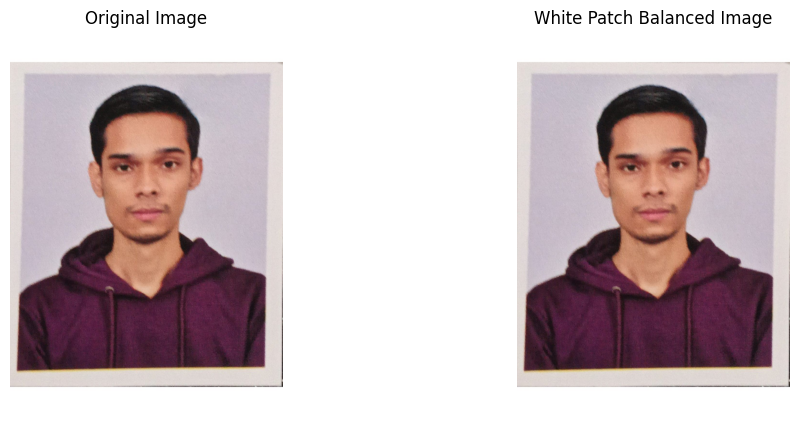

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------------------------------------
#   WHITE PATCH WHITE BALANCE (NUMPY ONLY)
# -------------------------------------------------------
def white_patch_balance(img_rgb):
    """
    Apply White Patch White Balance using NumPy.
    Input  : RGB image with values 0–255 (uint8)
    Output : White-balanced RGB image (uint8)

    Method:
    - Find the brightest pixel in each channel (max R, max G, max B)
    - Compute scaling factors to map those maxima to 255
    - Scale entire image by those factors (per-channel)
    """

    img = img_rgb.astype(np.float32)

    # 1) Find brightest (max) values in each channel
    max_R = img[:, :, 0].max()
    max_G = img[:, :, 1].max()
    max_B = img[:, :, 2].max()

    # 2) Compute scaling factors so that max becomes 255
    # If a channel is already 0 (unlikely), avoid division-by-zero
    scale_R = 255.0 / max_R if max_R > 0 else 1.0
    scale_G = 255.0 / max_G if max_G > 0 else 1.0
    scale_B = 255.0 / max_B if max_B > 0 else 1.0

    # 3) Apply per-channel multiplication
    img_balanced = img.copy()
    img_balanced[:, :, 0] *= scale_R
    img_balanced[:, :, 1] *= scale_G
    img_balanced[:, :, 2] *= scale_B

    # 4) Clip to 0–255 range and convert back to uint8
    img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_balanced


# -------------------------------------------------------
#   DEMO BLOCK — DISPLAY ORIGINAL AND WHITE-BALANCED IMAGE
# -------------------------------------------------------
# Load your image (change filename if needed)
img_path = "Gaurav_Pic.jpg"        # must exist in runtime
img_rgb = np.array(Image.open(img_path).convert("RGB"))

# Apply white patch white balance
wb_img = white_patch_balance(img_rgb)

# Display comparison
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wb_img)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()


E

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------------------------------------
# White Balance Slider Function
# ---------------------------------------------------------
def white_balance(img_rgb, value):
    """
    White Balance slider (0 = cold, 0.5 = original, 1 = warm)
    img_rgb : uint8 RGB image (0–255)
    value   : float in [0,1]
    Returns : uint8 RGB image (0–255)

    Method:
    - For cooling: add blue, reduce red
    - For warming: add red/yellow, reduce blue
    - Interpolate smoothly around midpoint (0.5)
    """

    img = img_rgb.astype(np.float32)

    # Normalize slider so:
    #   t = -1 for coldest
    #   t = 0 for neutral
    #   t = +1 for warmest
    t = 2 * (value - 0.5)

    # ---------- 1) Cooling effect (blue tint + reduced red) ----------
    if t < 0:
        strength = -t       # positive number 0..1
        # add blue, reduce red slightly
        img[:,:,2] += 50 * strength     # B channel
        img[:,:,0] -= 30 * strength     # R channel

    # ---------- 2) Warming effect (red/yellow tint, reduced blue) ----------
    if t > 0:
        strength = t        # positive number 0..1
        img[:,:,0] += 40 * strength     # R channel
        img[:,:,1] += 20 * strength     # G channel (to create yellow/orange)
        img[:,:,2] -= 30 * strength     # reduce blue for warm look

    # clip output
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


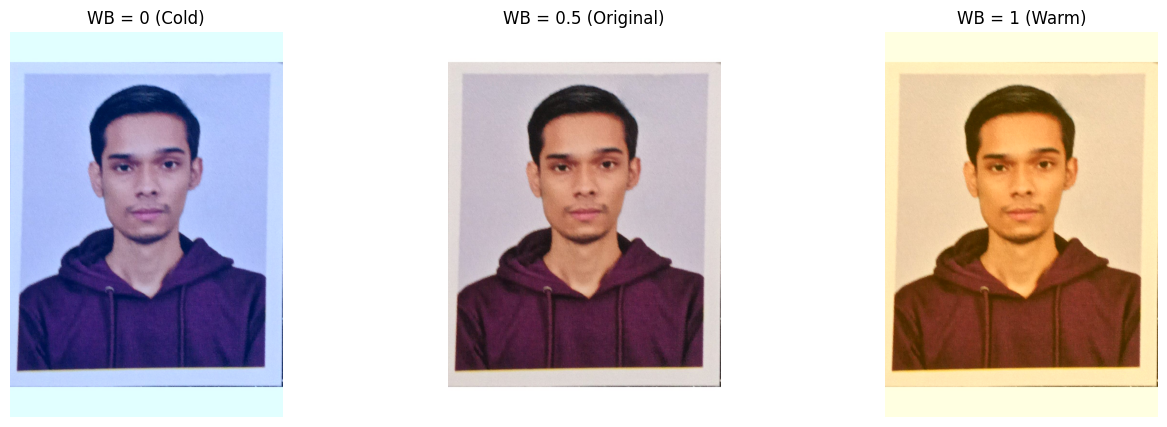

In [84]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = np.array(Image.open("Gaurav_Pic.jpg").convert("RGB"))

cold = white_balance(img, 0.0)
neutral = white_balance(img, 0.5)
warm = white_balance(img, 1.0)

plt.figure(figsize=(16,5))
plt.subplot(1,3,1); plt.imshow(cold); plt.title("WB = 0 (Cold)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(neutral); plt.title("WB = 0.5 (Original)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(warm); plt.title("WB = 1 (Warm)"); plt.axis("off")
plt.show()
